In [1]:
!pip install ucimlrepo

In [2]:
    pip install imbalanced-learn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 86.1 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_importance

from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
warnings.filterwarnings('ignore')

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features
y = covertype.data.targets


In [5]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X.tail(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
581002,2419,168,25,108,33,124,230,240,126,812,...,0,0,0,0,0,0,0,0,1,0
581003,2415,161,25,95,29,120,236,237,116,815,...,0,0,0,0,0,0,0,0,1,0
581004,2410,158,24,90,24,120,238,236,115,819,...,0,0,0,0,0,0,0,0,1,0
581005,2405,159,22,90,19,120,237,238,119,824,...,0,0,0,0,0,0,0,0,1,0
581006,2401,157,21,90,15,120,238,238,119,830,...,0,0,0,0,0,0,0,0,1,0
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,1,0
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,1,0
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,1,0
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,1,0
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,1,0


In [7]:
X.shape

(581012, 54)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [9]:
X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,0.051434,0.436074,0.063627
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,0.220882,0.495897,0.244087
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df = pd.concat([X,y], axis = 1)

In [11]:
df.duplicated().sum()

0

In [12]:
y.shape

(581012, 1)

In [13]:
y.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Cover_Type  581012 non-null  int64
dtypes: int64(1)
memory usage: 4.4 MB


In [15]:
#convert soil types and wilderness areas to boolean to make it easier to separate

bool_cols = [col for col in X.columns if 'Soil_Type'in col or 'Wilderness_Area' in col]

In [16]:
X[bool_cols] = X[bool_cols].astype(bool)

In [17]:
X.info() # to check it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  bool 
 11  Soil_Type1                          581012 non-null 

In [18]:
numerical_cols = X.select_dtypes(include = 'int64')

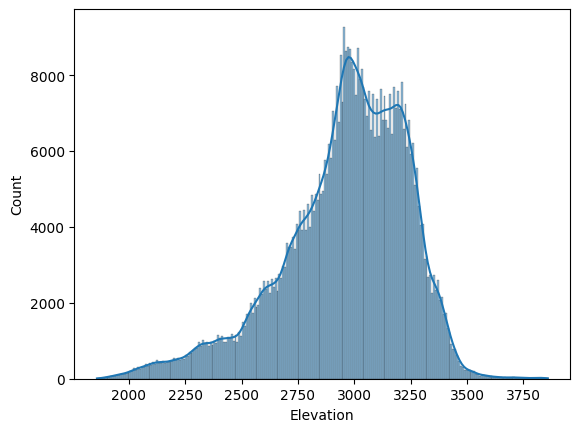

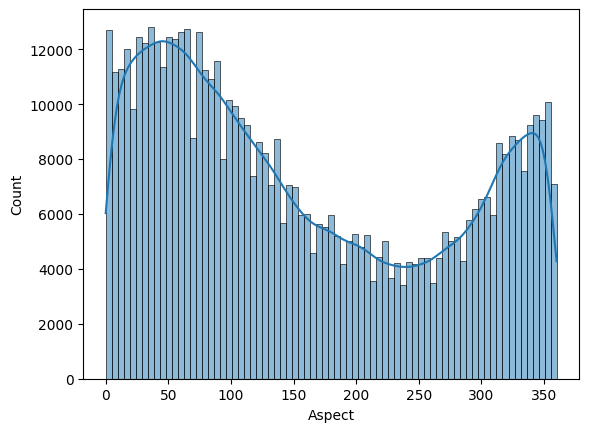

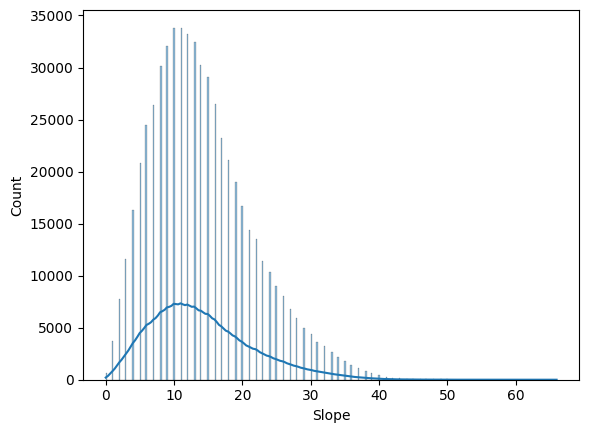

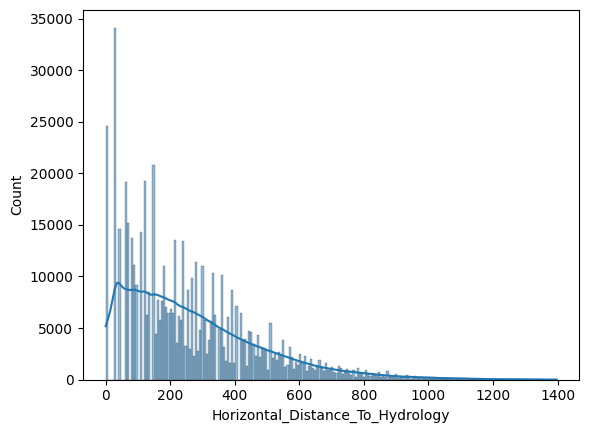

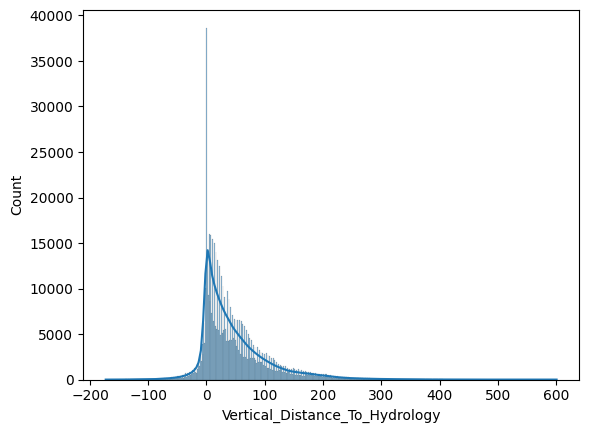

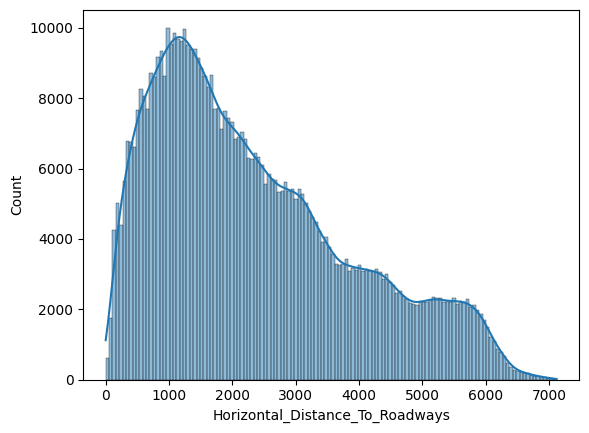

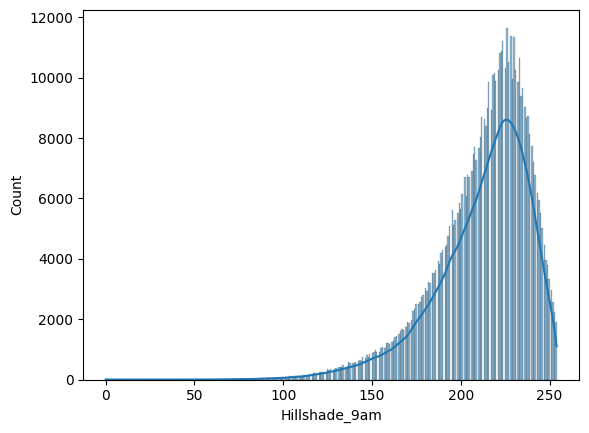

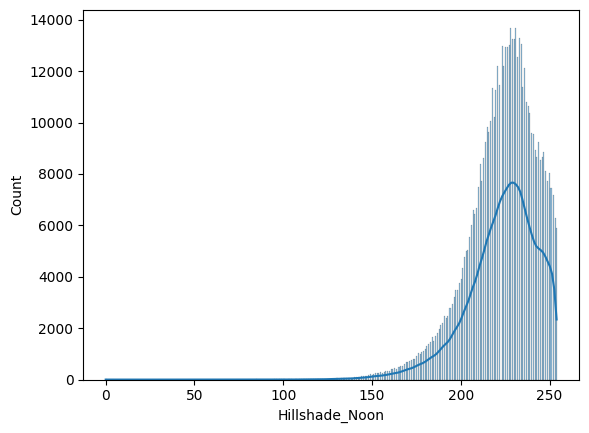

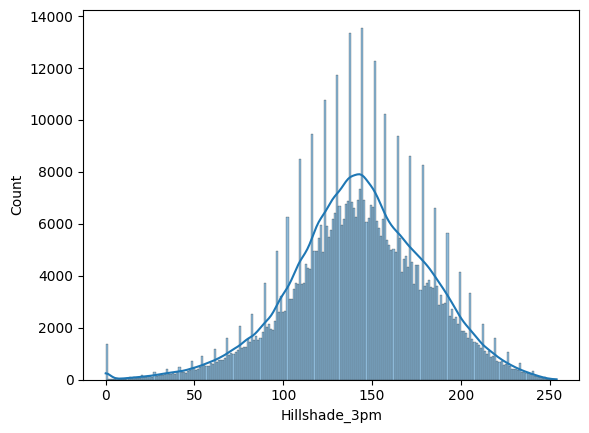

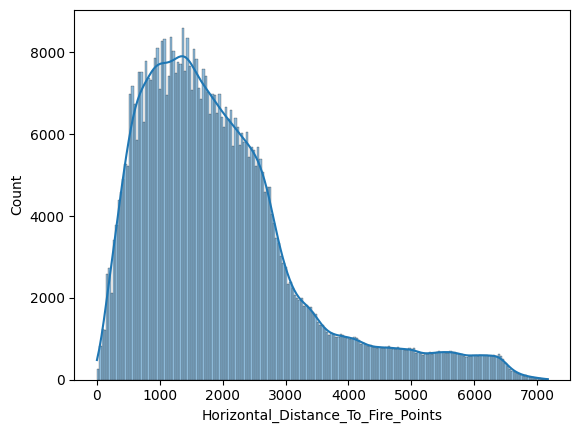

In [19]:
for col in numerical_cols.columns :
    sns.histplot(data = X, x = col , kde = True)
    plt.show()

In [20]:
bool_cols = X.select_dtypes(include = 'bool')

In [21]:
y['Cover_Type'].value_counts(normalize = True)

Cover_Type
2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: proportion, dtype: float64

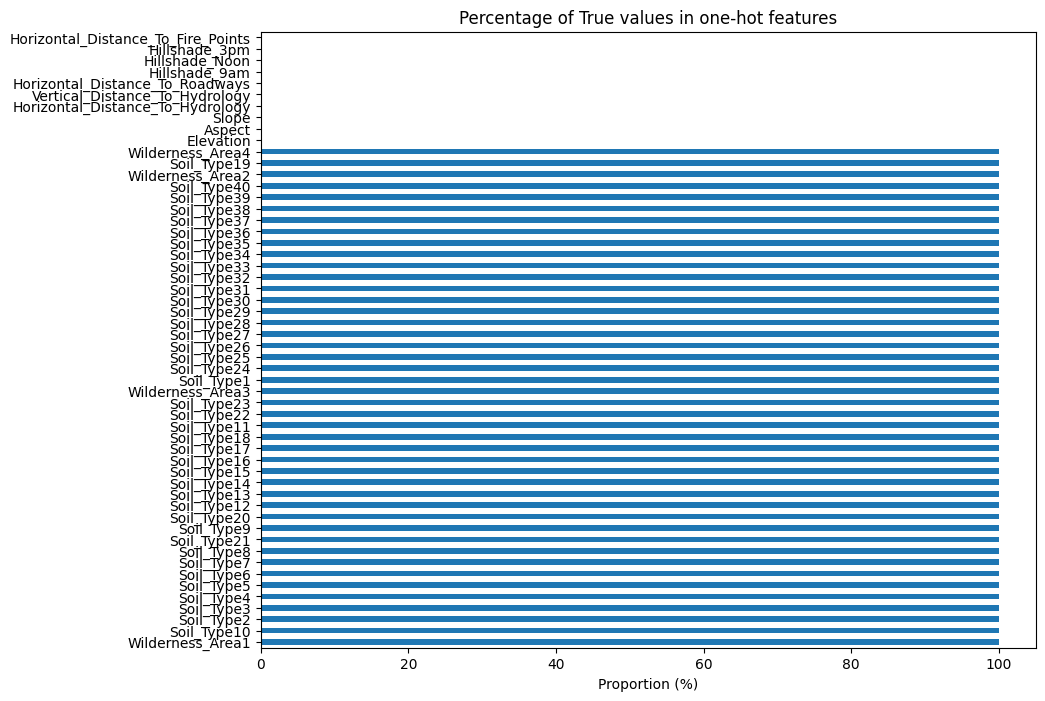

In [22]:
bool_balance = X[bool_cols].mean().sort_values(ascending=False) * 100
bool_balance.sort_values().plot(kind="barh", figsize=(10,8))
plt.title("Percentage of True values in one-hot features")
plt.xlabel("Proportion (%)")
plt.show()


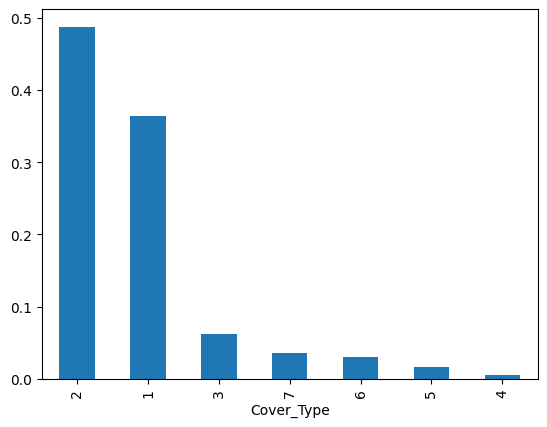

In [23]:
y['Cover_Type'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

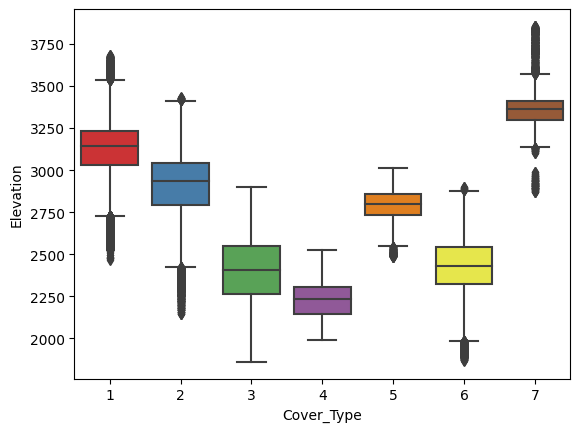

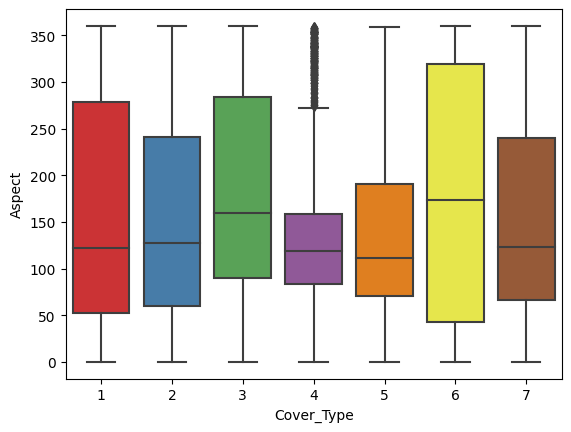

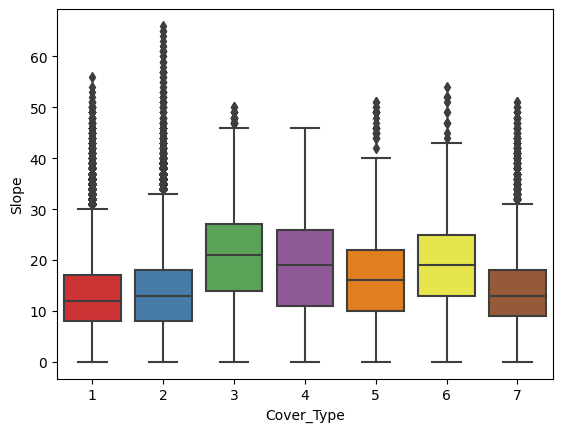

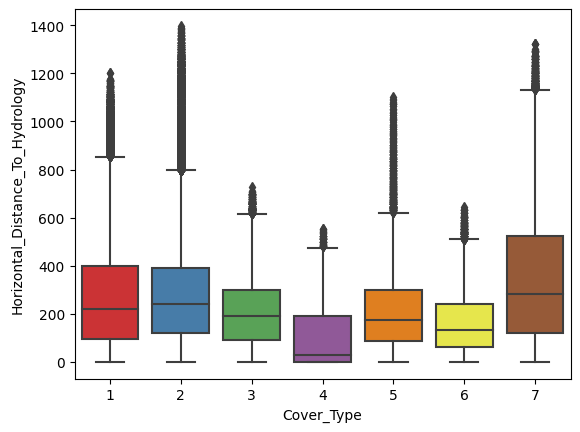

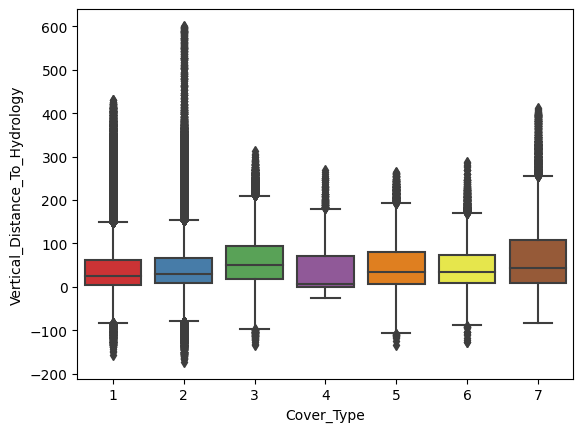

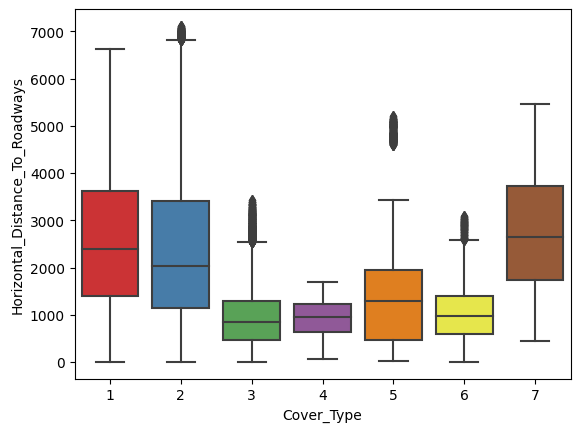

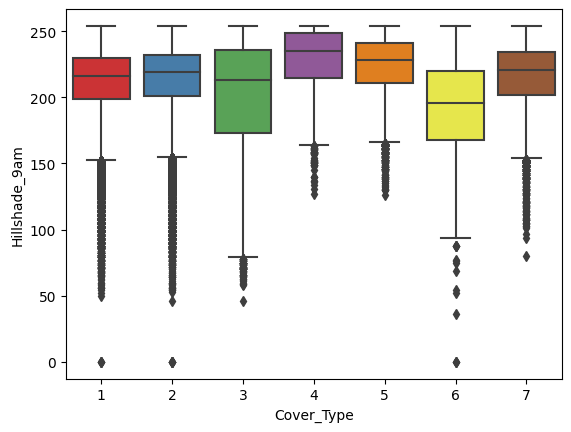

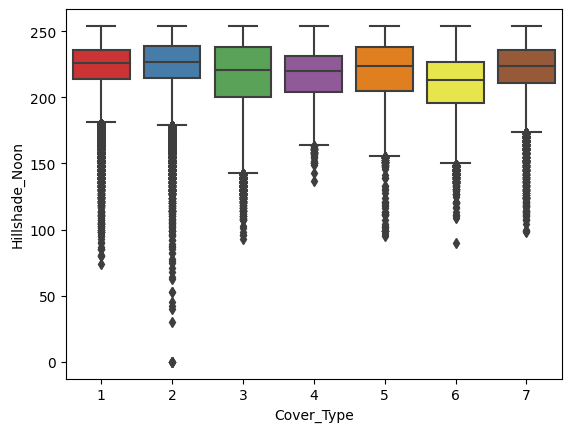

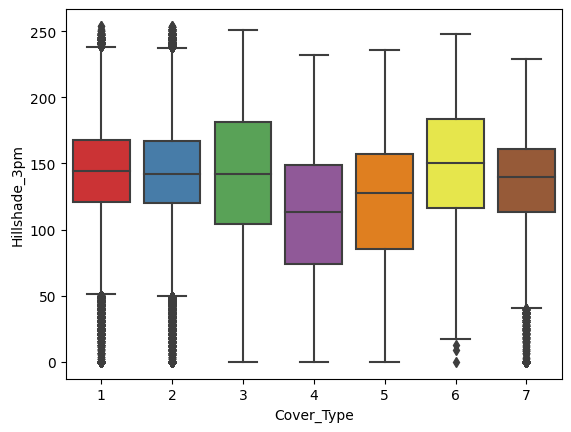

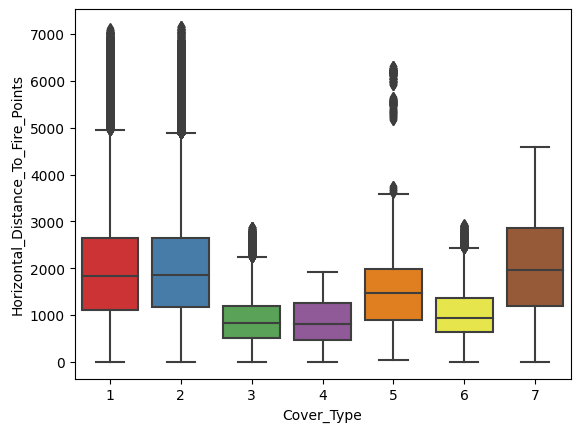

In [24]:
#one class dominating here
for col in numerical_cols.columns:
    sns.boxplot(x = df['Cover_Type'], y = col,palette = "Set1", data = df )
    plt.show()

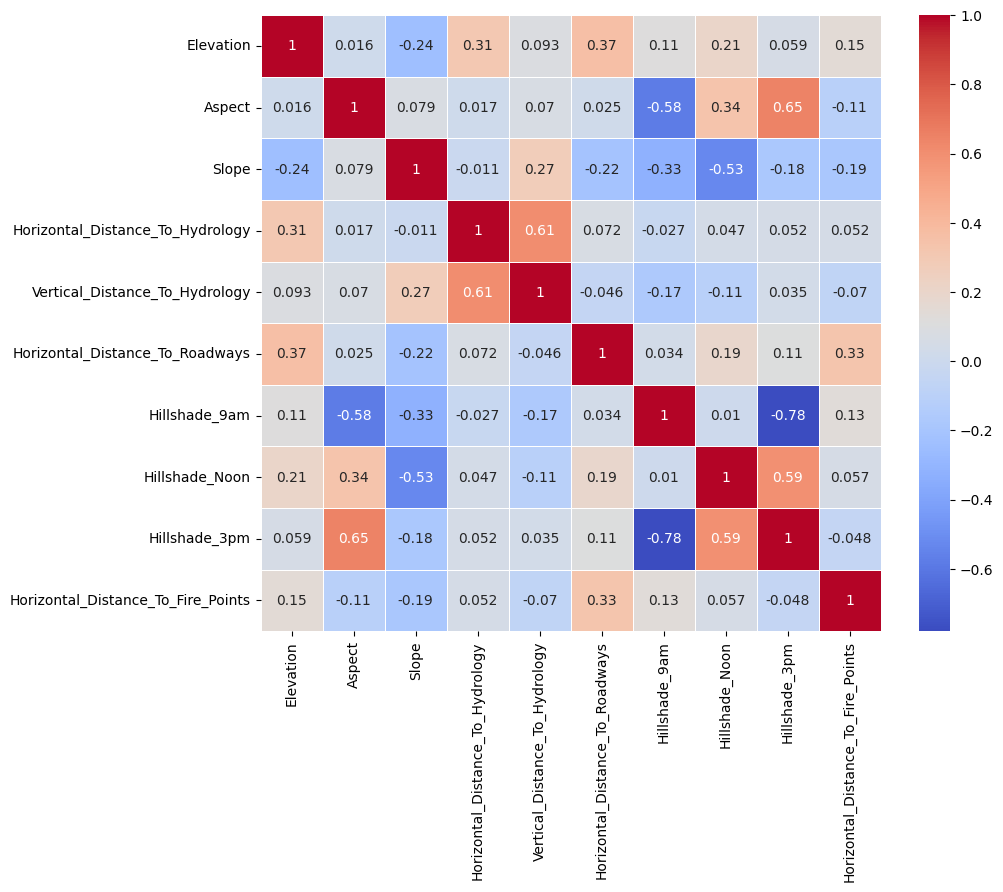

In [25]:
plt.figure(figsize= (10,8))
sns.heatmap(numerical_cols.corr(), cmap = 'coolwarm', linewidth = 0.5, annot = True)
plt.show()

### Normal correlations

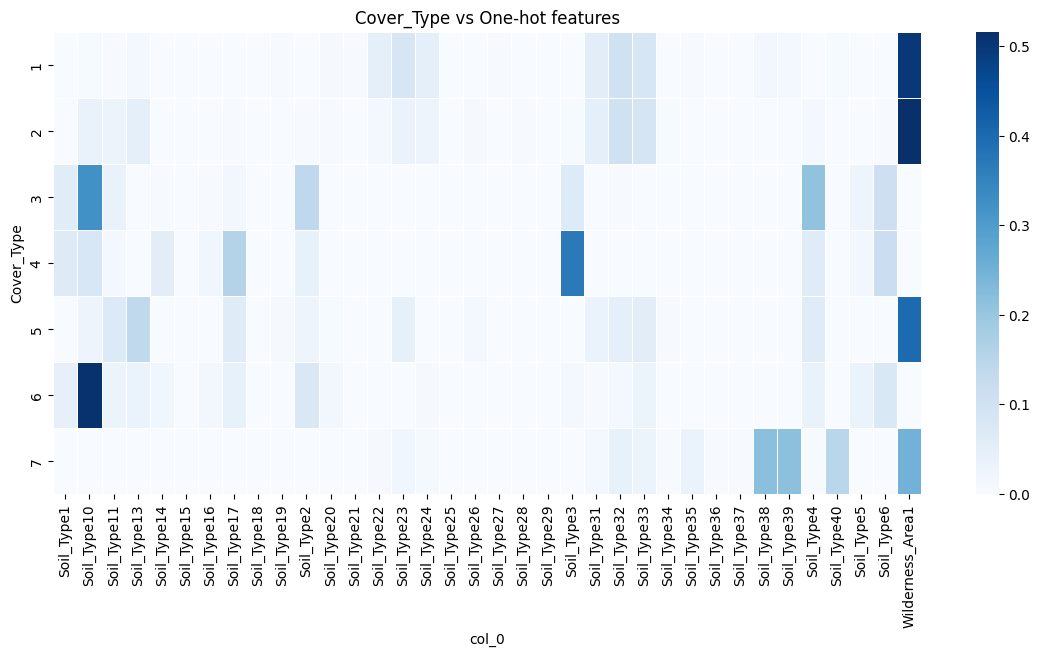

In [26]:
ct = pd.crosstab(df["Cover_Type"], bool_cols.idxmax(axis=1), normalize="index")

plt.figure(figsize=(14,6))
sns.heatmap(ct, cmap="Blues",linewidth = 0.5)
plt.title("Cover_Type vs One-hot features")
plt.show()


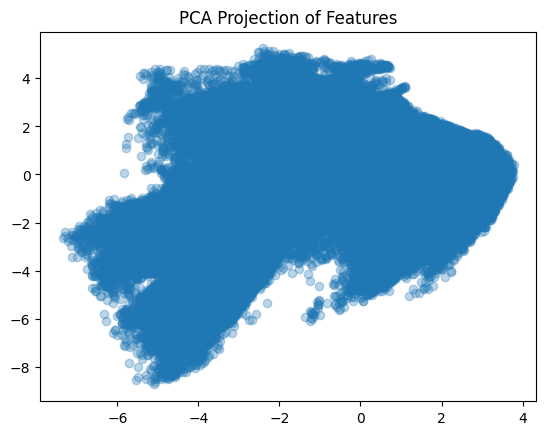

In [27]:
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], cmap="tab10", alpha=0.3)
plt.title("PCA Projection of Features")
plt.show()


big blob and perfect for models like XGboost?

In [28]:
# lets start with a basic random forsset
X_,x_test,y_,y_test = train_test_split(X,y,test_size = .2, random_state= 42)


In [29]:
x_train,x_val,y_train,y_val = train_test_split(X_,y_,test_size = 0.25, random_state= 42)

In [30]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_val_scaled = scale.transform(x_val)
x_test_scaled = scale.transform(x_test)

In [31]:
rf = RandomForestClassifier(n_estimators = 200 , random_state = 42)

In [32]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [33]:
y_predict_rf1 = rf.predict(x_test)

In [34]:
print(classification_report(y_test,y_predict_rf1))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42557
           2       0.94      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.92      0.83      0.87       526
           5       0.94      0.74      0.83      1995
           6       0.93      0.88      0.90      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.95    116203
   macro avg       0.94      0.89      0.92    116203
weighted avg       0.95      0.95      0.95    116203



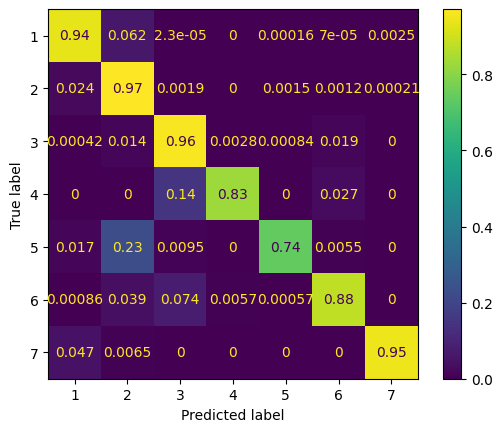

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_rf1, normalize = 'true')

In [36]:
xg = XGBClassifier(
    n_estimators = 1500,
    max_depth = 8,
    learning_rate = 0.1,
    subsample = 0.8,
    cosample_bytree= 0.8,
    objective = "multi:softprob",
    eval_metric = 'mlogloss',
    n_jobs = -1
)

In [37]:
y_train -=1

In [38]:
y_val -=1
y_test -=1

In [39]:
xg.fit(
    x_train,
    y_train,
    eval_set = [(x_val,y_val)],
    early_stopping_rounds = 40,
    verbose = True
)

[0]	validation_0-mlogloss:1.74191
[1]	validation_0-mlogloss:1.58454
[2]	validation_0-mlogloss:1.45769
[3]	validation_0-mlogloss:1.35198
[4]	validation_0-mlogloss:1.26089
[5]	validation_0-mlogloss:1.18085
[6]	validation_0-mlogloss:1.11093
[7]	validation_0-mlogloss:1.04925
[8]	validation_0-mlogloss:0.99436
[9]	validation_0-mlogloss:0.94570
[10]	validation_0-mlogloss:0.90135
[11]	validation_0-mlogloss:0.86247
[12]	validation_0-mlogloss:0.82657
[13]	validation_0-mlogloss:0.79446
[14]	validation_0-mlogloss:0.76461
[15]	validation_0-mlogloss:0.73791
[16]	validation_0-mlogloss:0.71384
[17]	validation_0-mlogloss:0.69133
[18]	validation_0-mlogloss:0.67091
[19]	validation_0-mlogloss:0.65194
[20]	validation_0-mlogloss:0.63482
[21]	validation_0-mlogloss:0.61878
[22]	validation_0-mlogloss:0.60407
[23]	validation_0-mlogloss:0.59080
[24]	validation_0-mlogloss:0.57852
[25]	validation_0-mlogloss:0.56730
[26]	validation_0-mlogloss:0.55678
[27]	validation_0-mlogloss:0.54710
[28]	validation_0-mlogloss:0.5

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, cosample_bytree=0.8, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=-1,
              num_parallel_tree=None, ...)

In [40]:
y_predict_xg = xg.predict(x_test)

In [41]:
print(classification_report(y_test,y_predict_xg))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     42557
           1       0.97      0.97      0.97     56500
           2       0.96      0.97      0.97      7121
           3       0.93      0.87      0.90       526
           4       0.93      0.86      0.90      1995
           5       0.94      0.94      0.94      3489
           6       0.97      0.97      0.97      4015

    accuracy                           0.97    116203
   macro avg       0.95      0.93      0.94    116203
weighted avg       0.97      0.97      0.97    116203



In [43]:
#we can see the problem is in imblanced classes espicially in class 3,4
# so we will make the SMOTE technique on training data to avoid leakage to the val and test datasets
smote = SMOTE(random_state = 42)

In [45]:
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [46]:
xg.fit(
    X_train_res,
    y_train_res,
    eval_set = [(x_val,y_val)],
    early_stopping_rounds = 40,
    verbose = True
)

[0]	validation_0-mlogloss:1.78665
[1]	validation_0-mlogloss:1.66203
[2]	validation_0-mlogloss:1.55742
[3]	validation_0-mlogloss:1.46816
[4]	validation_0-mlogloss:1.39099
[5]	validation_0-mlogloss:1.32338
[6]	validation_0-mlogloss:1.26362
[7]	validation_0-mlogloss:1.21119
[8]	validation_0-mlogloss:1.16437
[9]	validation_0-mlogloss:1.12143
[10]	validation_0-mlogloss:1.08162
[11]	validation_0-mlogloss:1.04747
[12]	validation_0-mlogloss:1.01584
[13]	validation_0-mlogloss:0.98597
[14]	validation_0-mlogloss:0.95898
[15]	validation_0-mlogloss:0.93329
[16]	validation_0-mlogloss:0.91022
[17]	validation_0-mlogloss:0.88910
[18]	validation_0-mlogloss:0.86886
[19]	validation_0-mlogloss:0.85066
[20]	validation_0-mlogloss:0.83339
[21]	validation_0-mlogloss:0.81725
[22]	validation_0-mlogloss:0.80228
[23]	validation_0-mlogloss:0.78804
[24]	validation_0-mlogloss:0.77528
[25]	validation_0-mlogloss:0.76242
[26]	validation_0-mlogloss:0.75015
[27]	validation_0-mlogloss:0.73896
[28]	validation_0-mlogloss:0.7

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, cosample_bytree=0.8, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=-1,
              num_parallel_tree=None, ...)

In [47]:
y_predict_xg2 = xg.predict(x_test)

In [48]:
print(classification_report(y_test,y_predict_xg2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     42557
           1       0.97      0.97      0.97     56500
           2       0.97      0.97      0.97      7121
           3       0.92      0.90      0.91       526
           4       0.88      0.92      0.90      1995
           5       0.94      0.95      0.95      3489
           6       0.96      0.98      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.94      0.95      0.95    116203
weighted avg       0.96      0.96      0.96    116203



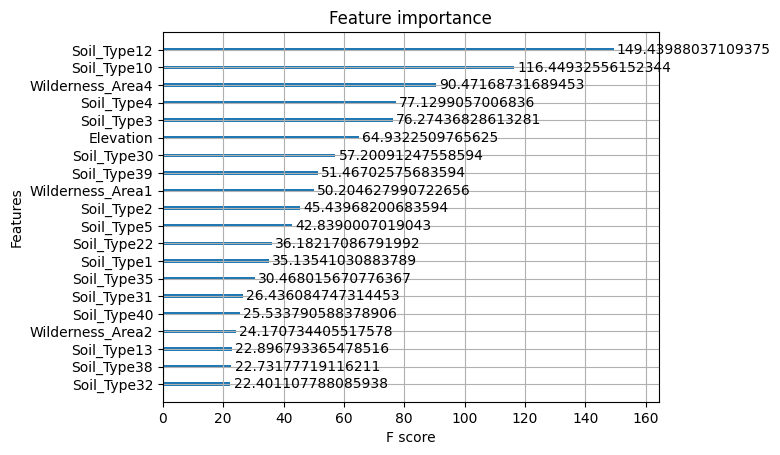

In [53]:
plot_importance(xg, max_num_features = 20 , importance_type = 'gain')
plt.show()

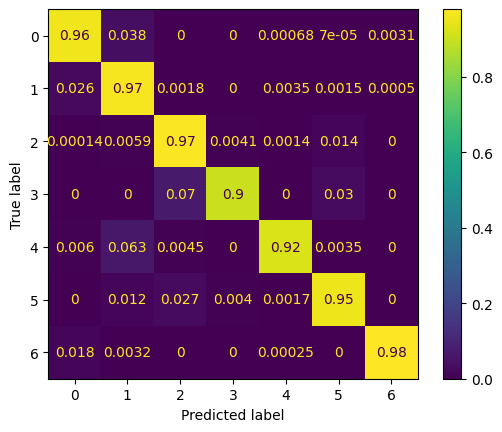

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_xg2, normalize = 'true')
plt.show()

#################################################################################################